<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py #librerua para crear archivos , h5py
import sys
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import stft
import math

In [ ]:
def perform_cwt(signal, scales):
    wavelet =  'gaus1'  # Morlet wavelet

    # Perform Continuous Wavelet Transform
    cwt_coefficients, frequencies = pywt.cwt(signal, scales, wavelet)

    return cwt_coefficients, frequencies



In [ ]:
#funcion para obtener las keys de los archivos .h5py

def print_h5py_keys(file_path):
    with h5py.File(file_path, 'r') as h5_file:
        print("Keys in the h5py file:")
        for key in h5_file.keys():
            print(key)



In [ ]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import unzipmodule
import graficador

In [ ]:
#celda para crear la lista con los paths de mi data
paths=[] #creo la lista de pahts
names=[] #creo la lista de nombres
output_file=[]
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3')
names.append('vibration')
names.append('part1')
names.append('part2')
names.append('part3')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1/vibration')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1/part1')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2/part2')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3/part3')


Trabajo con la data almacenada en .vibration, la cual es data a carga variable y velocidad constante

In [ ]:
# # unizp de vibration_1 (colocar los unzip de todas la data juntos )
# unzipmodule.unzip_1(paths[0],names[0]+".zip")
# #creacion de los h5py de vibration 1
# unzipmodule.zip_a(paths[0] ,output_file[0])
# #eliminacion de los .mat para ahorrar espacio
# unzipmodule.delete_files(paths[0] ,'.mat')

Trabajo con la data almacenada en .part1, la cual es data a velocidad variable (alguna fue sampleada con un vector de tiempo distinto , recordar)

In [ ]:
# # unizp de part1  (colocar los unzip de todas la data juntos )
# unzipmodule.unzip_1(paths[1],names[1]+".zip")
# #creacion de los h5py de part1
# unzipmodule.zip_a(paths[1] ,output_file[1])
# unzipmodule.delete_files(paths[1] ,'.csv')

Trabajo con la data almacenada en .part2, la cual es data a velocidad variable (alguna fue sampleada con un vector de tiempo distinto , recordar

In [ ]:
# # unizp de part2  (colocar los unzip de todas la data juntos )
# unzipmodule.unzip_1(paths[2],names[2]+".zip")
# #creacion de los h5py de part2
# unzipmodule.zip_a(paths[2] ,output_file[2])
# unzipmodule.delete_files(paths[2] ,'.csv')

Trabajo con la data almacenada en .part3, la cual es data a velocidad variable (alguna fue sampleada con un vector de tiempo distinto , recordar

In [ ]:
# # unizp de part3  (colocar los unzip de todas la data juntos )
# unzipmodule.unzip_1(paths[3],names[3]+".zip")
# #creacion de los h5py de part3
# unzipmodule.zip_a(paths[3] ,output_file[3])
# unzipmodule.delete_files(paths[3] ,'.csv')

Available files:
1. vibration_ball_0
2. vibration_ball_1
3. vibration_ball_2
4. vibration_ball_constant
5. vibration_inner_0
6. vibration_inner_1
7. vibration_inner_2
8. vibration_inner_constant
9. vibration_normal_0
10. vibration_normal_1
11. vibration_normal_2
12. vibration_normal_constant
13. vibration_outer_0
14. vibration_outer_1
15. vibration_outer_2
16. vibration_outer_constant
Enter the index of the file you want to plot: 9


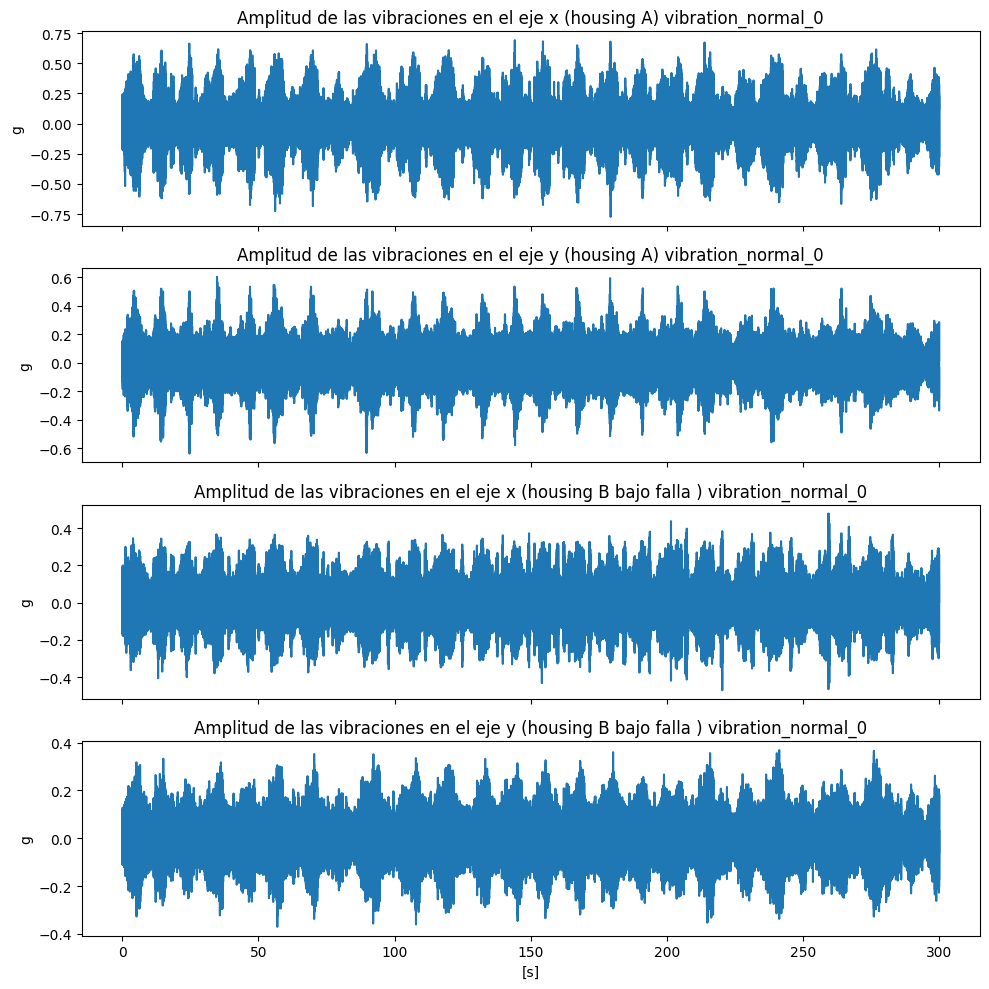

In [ ]:

# graficos  a carga variable
h5py_file =output_file[1]
graficador.plot_data_from_h5py(h5py_file)

In [ ]:
h5py_file =output_file[1]
with h5py.File(h5py_file, 'r') as h5_file:
  keys = list(h5_file.keys())
  selected_key = keys[8]
  selected_data = h5_file[selected_key][:]

selected_key

'vibration_normal_0'

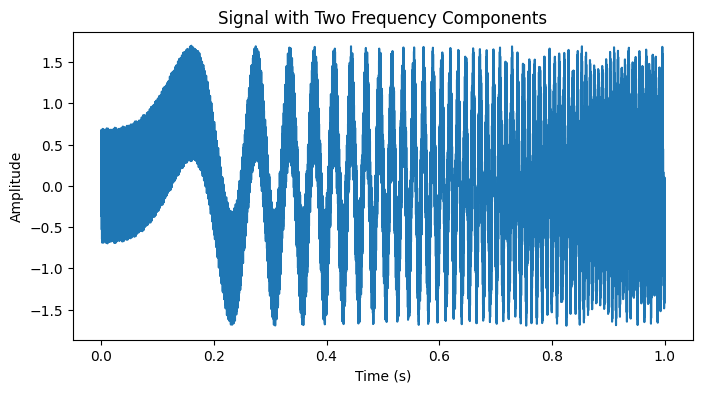

In [ ]:

duration = 1  # Duration of the signal (seconds)
fs = 25.6e3 # Sampling rate (Hz
t = np.linspace(0, duration, int(fs * duration))
f1=60*t**2
f2=60*7
f3=3e3
signal = np.sin(2 * np.pi * f1 * t) +0.2* np.sin(2 * np.pi * f2 * t)+0.5* np.sin(2 * np.pi * f3 * t)
plt.figure(figsize=(8, 4))
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with Two Frequency Components')
plt.show()

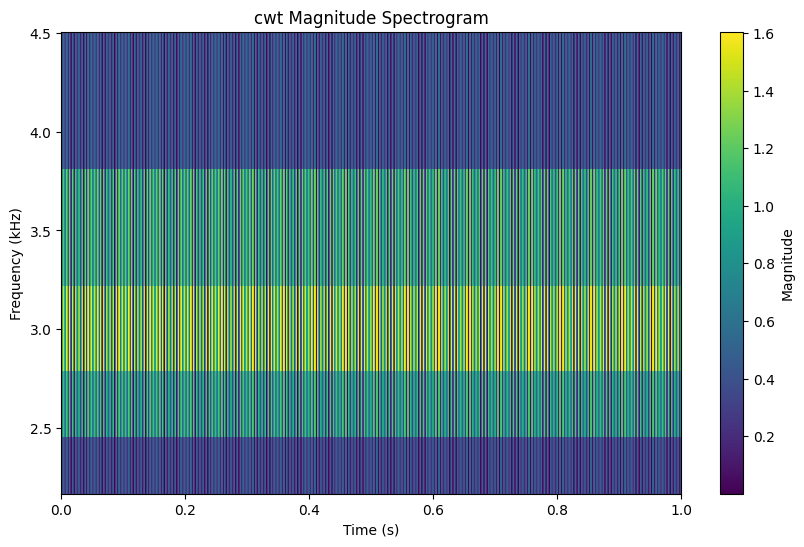

In [ ]:
#En esta celda use la libreria pwct (no sirve)

### senal de prueba
# Generate a sample signal
duration = 1  # Duration of the signal (seconds)
fs = 25.6e3 # Sampling rate (Hz
t = np.linspace(0, duration, int(fs * duration))
f1=60*t**2
f2=60*7
f3=3e3
signal = np.sin(2 * np.pi * f1 * t) +0.2* np.sin(2 * np.pi * f2 * t)+0.5* np.sin(2 * np.pi * f3 * t)
########3333 aplico la transformada
scales =np.arange(5,10)
sampling_period=1/25.6e3
wavelet= 'morl'
f = pywt.scale2frequency(wavelet, scales)/(1e3*sampling_period)
cwtm, freq = pywt.cwt(signal, scales, wavelet)  #recordar que esa frecuencia es normalizada(freq) , es decir tengo que divir entre el sampleo

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(cwtm), shading='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.title('cwt Magnitude Spectrogram')
plt.show()


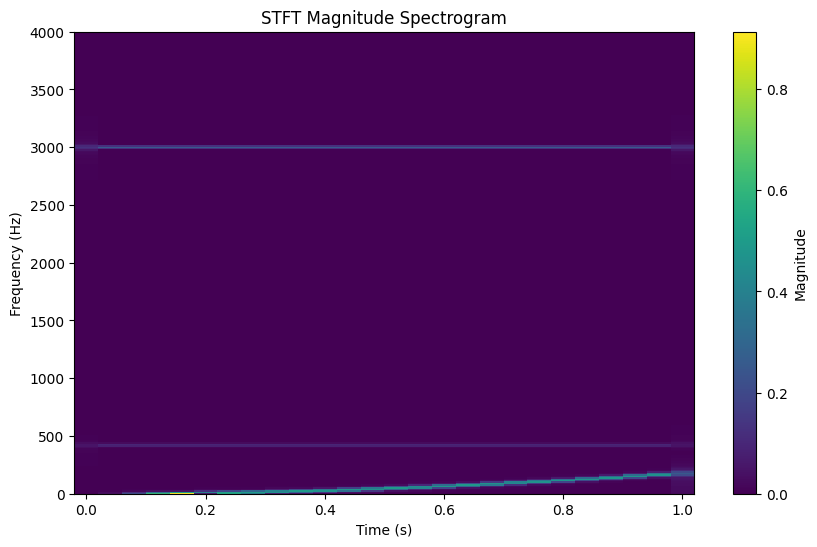

In [ ]:
# Generate a sample signal
fs = 25.6e3  # Sampling frequency
# Compute the STFT
frequencies, time_points, magnitude = stft(signal, fs, window='hann', nperseg=2048, noverlap= 1024)

# Plot the magnitude spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_points, frequencies, np.abs(magnitude), shading='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT Magnitude Spectrogram')
fs_limit=4e3
plt.ylim(0, fs_limit)  # Set the frequency range for visualization
plt.show()


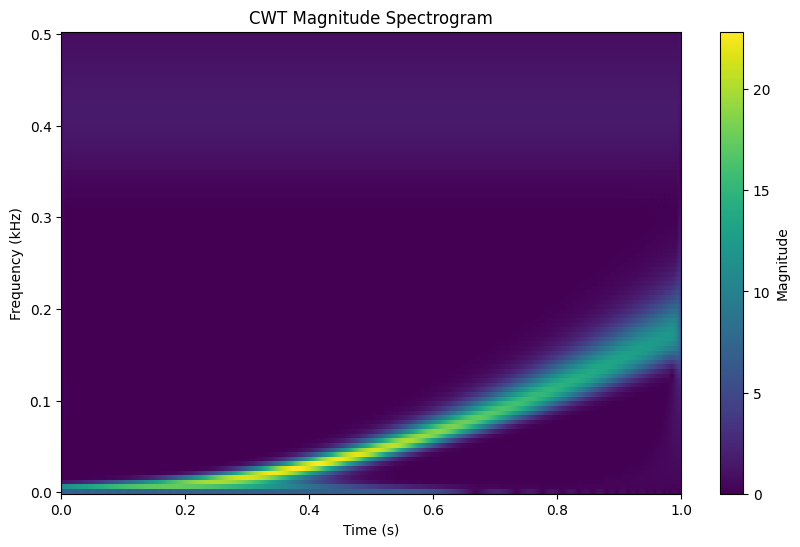

In [ ]:
from scipy import signal    #aqui estoy usando la libreria signal

duration = 1  # Duration of the signal (seconds)
fs = 25.6e3 # Sampling rate (Hz
t = np.linspace(0, duration, int(fs * duration))
f1=60*t**2
f2=60*7
f3=3e3

sig = np.sin(2 * np.pi * f1 * t) +0.2* np.sin(2 * np.pi * f2 * t)+0.5* np.sin(2 * np.pi * f3 * t)
w =7
freq = np.linspace(1, 500, 100)
widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)


plt.figure(figsize=(10, 6))
plt.pcolormesh(t, freq/1e3, np.abs(cwtm), cmap='viridis', shading='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.title('CWT Magnitude Spectrogram')
plt.show()


In [ ]:
# len(np.linspace(1, fs/2, 100))
fs/2*(1/1e3)

12.8